## **Analisis del Dataset del Titanic**

En este Jupyter Notebook se extraerán y analizarán los datos contenidos en el dataset del archivo csv de _Titanic_, mostrando las conclusiones y hallazgos obtenidos durante el proceso de forma gráfica y legible.

In [5]:
# Importamos las librerías que vamos a utilizar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("titanic_raw.csv") #Importamos el archivo csv

In [7]:
df.head(5) # Extraemos las 5 primeras filas del dataset para explorarlo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.set_index("PassengerId", inplace=True) # Establezco el PassengerId como index ya que es un identificador único
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
df.columns # Obtengo el nombre de las columnas (al hacerlo un índice, no aparece PassengerId)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.describe() # Utilizo el método describe de pandas para encontrar patrones

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Estudiando los datos arrojados por el df.describe(), podemos apreciar que hubo gente que no pagó nada por su billete a bordo, tal vez fuesen empleados. También podemos ver que la probabilidad a priori, sin tener en cuenta si influye el sexo, de sobrevivir es del 38%.

In [11]:
df.isnull().any() # Ver si hay y en caso de haber, qué columnas tinen valores nulos

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Vemos que las columnas Age, Cabin y Embarked contienen valores nulos.

In [13]:
cantidad_total_personas = df.Sex.count()
cantidad_total_hombres = df.Sex.loc[df.Sex == 'male'].count()
cantidad_total_mujeres = df.Sex.loc[df.Sex == 'female'].count()

print(f"{cantidad_total_personas = }", "\n")

print(f"Número de personas divididas por género: \n{df.Sex.value_counts()}", "\n")

print(f"El {round(cantidad_total_hombres / cantidad_total_personas * 100, 2)}% eran Hombres y el {round(cantidad_total_mujeres / cantidad_total_personas * 100, 2)}% eran Mujeres")

cantidad_total_personas = 891 

Número de personas divididas por género: 
Sex
male      577
female    314
Name: count, dtype: int64 

El 64.76% eran Hombres y el 35.24% eran Mujeres


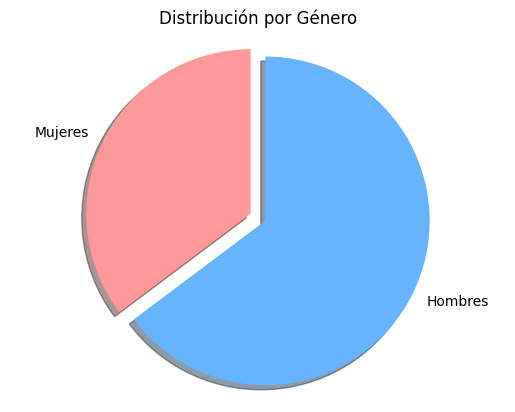

In [14]:
plt.pie([cantidad_total_mujeres, cantidad_total_hombres],
        labels=["Mujeres", "Hombres"],
        colors=["#ff9999","#66b3ff"],
        startangle=90,
        shadow=True,
        explode=(0.1, 0))
plt.title("Distribución por Género")
plt.axis('equal')
plt.show()

In [15]:
df.Survived.value_counts()

personas_murieron = df.Survived.loc[df.Survived == 0].count()
personas_sobrevivieron = df.Survived.loc[df.Survived == 1].count()

print(f"De {cantidad_total_personas} personas, murieron {personas_murieron} personas y sobrevivieron {personas_sobrevivieron} personas.")

De 891 personas, murieron 549 personas y sobrevivieron 342 personas.


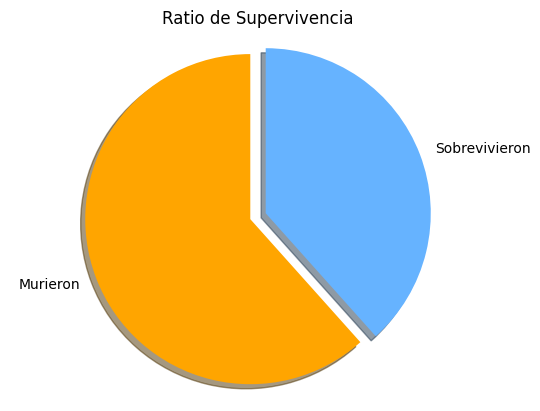

In [16]:
plt.pie([personas_murieron, personas_sobrevivieron],
        labels=["Murieron", "Sobrevivieron"],
        colors=["orange","#66b3ff"],
        startangle=90,
        shadow=True,
        explode=(0.1, 0))
plt.title("Ratio de Supervivencia")
plt.axis('equal')
plt.show()

In [17]:
mujeres_sobrevivieron = df.Survived.loc[(df.Sex == 'female') & (df.Survived == 1)].count()
mujeres_murieron = df.Survived.loc[(df.Sex == 'female') & (df.Survived == 0)].count()

hombres_sobrevivieron = df.Survived.loc[(df.Sex == 'male') & (df.Survived == 1)].count()
hombres_murieron = df.Survived.loc[(df.Sex == 'male') & (df.Survived == 0)].count()

print(f"Sobrevivieron {mujeres_sobrevivieron} mujeres.") # Nº de mujeres que sobrevivieron
print(f"Murieron {mujeres_murieron} mujeres.") # Nº de mujeres que murieron
print()
print(f"Sobrevivieron {hombres_sobrevivieron} hombres.") # Nº de hombres que sobrevivieron
print(f"Murieron {hombres_murieron} hombres.") # Nº de hombres que murieron
print()
print(f"El {round((hombres_sobrevivieron + mujeres_sobrevivieron) / cantidad_total_personas * 100, 2)}% de las personas sobrevivieron.")
print()
print(f"El {round(mujeres_sobrevivieron / df.Survived.loc[df.Survived == 1].count() * 100, 2)}% de los que sobrevivieron eran mujeres.")
print(f"El {round(hombres_murieron / df.Survived.loc[df.Survived == 0].count() * 100, 2)}% de los que murieron eran hombres.")

Sobrevivieron 233 mujeres.
Murieron 81 mujeres.

Sobrevivieron 109 hombres.
Murieron 468 hombres.

El 38.38% de las personas sobrevivieron.

El 68.13% de los que sobrevivieron eran mujeres.
El 85.25% de los que murieron eran hombres.


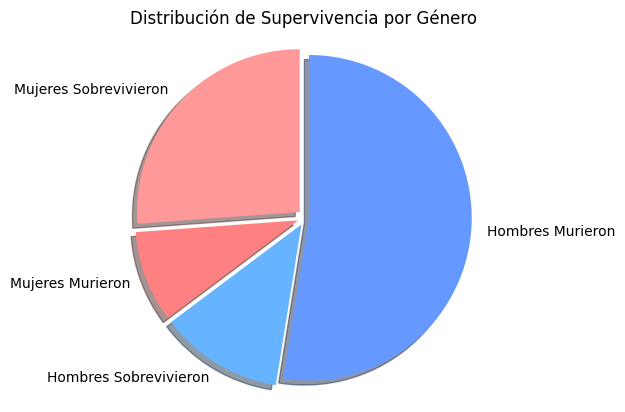

In [18]:
plt.pie([mujeres_sobrevivieron, mujeres_murieron, hombres_sobrevivieron, hombres_murieron],
        labels=["Mujeres Sobrevivieron", "Mujeres Murieron", "Hombres Sobrevivieron", "Hombres Murieron"],
        colors=["#ff9999", "#ff8080", "#66b3ff", "#6699ff"],
        startangle=90,
        shadow=True,
        explode=(0.05, 0.05, 0.05, 0.02))
plt.title("Distribución de Supervivencia por Género")
plt.axis('equal')
plt.show()

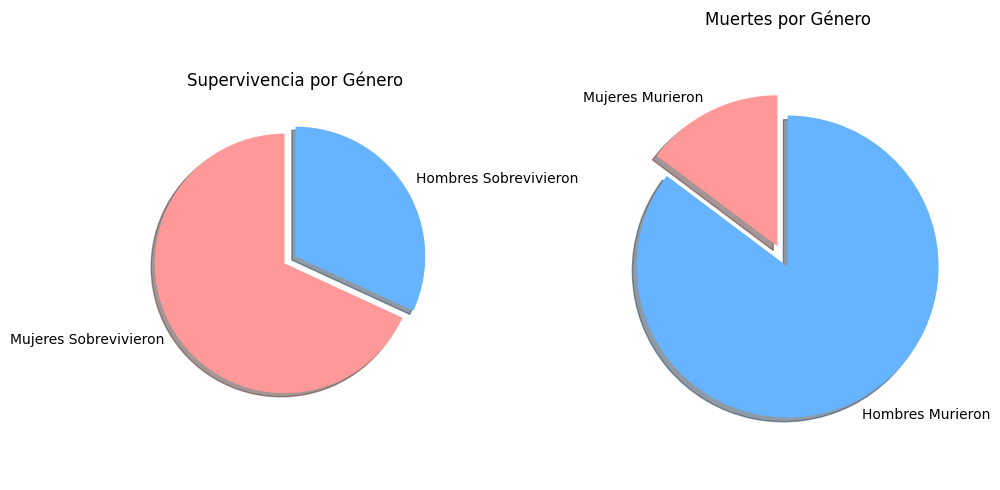

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].pie([mujeres_sobrevivieron, hombres_sobrevivieron],
        labels=["Mujeres Sobrevivieron", "Hombres Sobrevivieron"],
        colors=["#ff9999","#66b3ff"],
        startangle=90,
        shadow=True,
        explode=(0.1, 0))

axs[1].pie([mujeres_murieron, hombres_murieron],
        labels=["Mujeres Murieron", "Hombres Murieron"],
        colors=["#ff9999","#66b3ff"],
        startangle=90,
        shadow=True,
        explode=(0, 0.15))

axs[0].set_title("Supervivencia por Género")
axs[1].set_title("Muertes por Género")
plt.axis('equal')
plt.tight_layout()
plt.show()

Como podemos observar claramente en los gráficos de sectores, la tasa de muertes es superior en los hombres que para las mujeres.

In [20]:
# Considerando adultos a los mayores de 14 años.
total_niños = df.Age.loc[df.Age <= 14].count()

# print(f"El {}% de niños independientemente del género sobrevivieron")

print()

print(f"Habían {total_niños} niños.")
print(f"El {round(total_niños / cantidad_total_personas * 100, 2)}% de todas las personas ({cantidad_total_personas}) eran niños.")

niños_murieron = df.Age.loc[(df.Age <= 14) & (df.Survived == 0) & (df.Sex == 'male')].count()
niños_sobrevivieron = df.Age.loc[(df.Age <= 14) & (df.Survived == 1) & (df.Sex == 'male')].count()

niñas_murieron = df.Age.loc[(df.Age <= 14) & (df.Survived == 0) & (df.Sex == 'female')].count()
niñas_sobrevivieron = df.Age.loc[(df.Age <= 14) & (df.Survived == 1) & (df.Sex == 'female')].count()

print(f"El {round((niños_sobrevivieron + niñas_sobrevivieron) / total_niños * 100, 2)}% de los niñ@s sobrevivieron, teniendo en cuenta que el {round(personas_sobrevivieron / cantidad_total_personas * 100, 2)}% de personas sobrevivieron.")
print()
print(f"El {round(niñas_sobrevivieron / total_niños * 100, 2)}% de los niños que sobrevivieron eran chicas.")
print(f"El {round(niños_sobrevivieron / total_niños * 100, 2)}% de los niños que sobrevivieron eran chicos.")
print()
print(f"El {round(niñas_murieron / total_niños * 100, 2)}% de los niños que muerieron eran chicas.")
print(f"El {round(niños_murieron / total_niños * 100, 2)}% de los niños que muerieron eran chicos.")


Habían 77 niños.
El 8.64% de todas las personas (891) eran niños.
El 58.44% de los niñ@s sobrevivieron, teniendo en cuenta que el 38.38% de personas sobrevivieron.

El 31.17% de los niños que sobrevivieron eran chicas.
El 27.27% de los niños que sobrevivieron eran chicos.

El 18.18% de los niños que muerieron eran chicas.
El 23.38% de los niños que muerieron eran chicos.


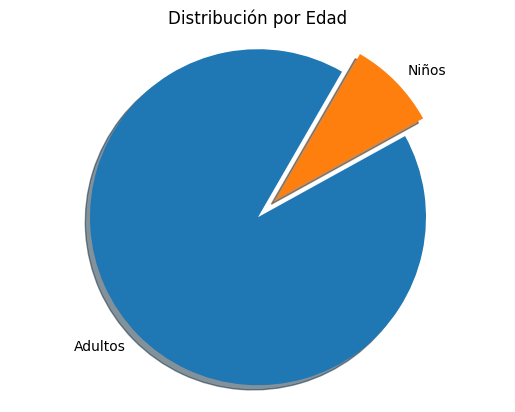

In [21]:
plt.pie([cantidad_total_personas - total_niños, total_niños],
        labels=["Adultos", "Niños"],
        startangle=60,
        shadow=True,
        explode=(0.15, 0))

plt.title("Distribución por Edad")
plt.axis('equal')
plt.show()

In [22]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

El 24.24% viajaba en primera clase.
El 20.65% viajaba en segunda clase.
El 55.11% viajaba en tercera clase.


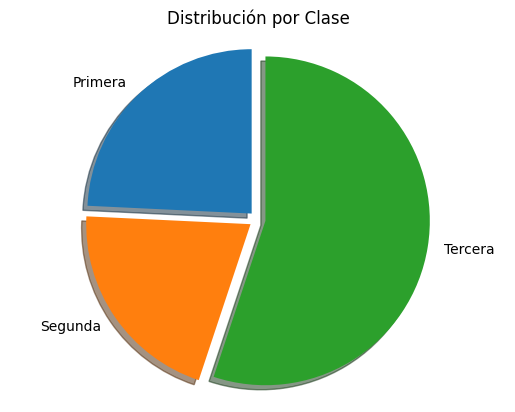

In [23]:
cantidad_total_clase1 = df.Pclass.loc[df.Pclass == 1].count()
cantidad_total_clase2 = df.Pclass.loc[df.Pclass == 2].count()
cantidad_total_clase3 = df.Pclass.loc[df.Pclass == 3].count()

print(f"El {round((cantidad_total_clase1 / cantidad_total_personas) * 100, 2)}% viajaba en primera clase.")
print(f"El {round((cantidad_total_clase2 / cantidad_total_personas) * 100, 2)}% viajaba en segunda clase.")
print(f"El {round((cantidad_total_clase3 / cantidad_total_personas) * 100, 2)}% viajaba en tercera clase.")

plt.pie([cantidad_total_clase1, cantidad_total_clase2, cantidad_total_clase3],
        labels=["Primera", "Segunda", "Tercera"],
        shadow=True,
        startangle=90,
        explode=(0.05, 0.05, 0.05))

plt.title("Distribución por Clase")
plt.axis('equal')
plt.show()

In [24]:
df.groupby(['Pclass']).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


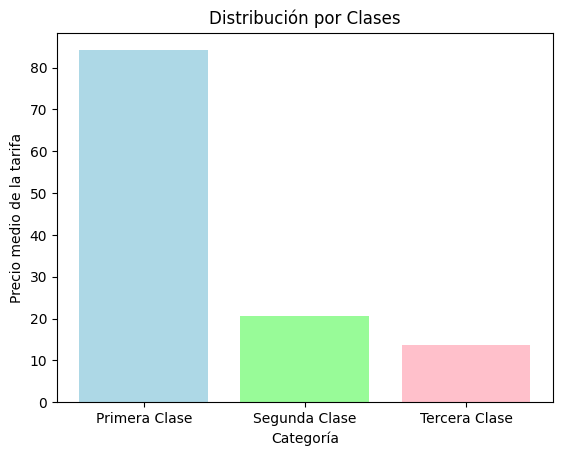

In [93]:
df.Fare.loc[df.Pclass == 1].mean()
df.Fare.loc[df.Pclass == 1].mean()
df.Fare.loc[df.Pclass == 1].mean()

plt.bar(["Primera Clase", "Segunda Clase", "Tercera Clase"], 
        [df.Fare.loc[df.Pclass == 1].mean(), df.Fare.loc[df.Pclass == 2].mean(), df.Fare.loc[df.Pclass == 3].mean()],
        color=['#ADD8E6', '#98FB98', '#FFC0CB'])

plt.title("Distribución por Clases")
plt.xlabel("Categoría")
plt.ylabel("Precio medio de la tarifa")
plt.show()

Como podemos apreciar en la gráfica de barra de distribución por clases, la diferencia media de precio entre viajar en segunda y primera clase es de más de 4 veces el precio.

In [26]:
total_personas_embarcaron = df.Embarked.count()

total_embarque_S = df.Embarked.loc[df.Embarked == 'S'].count()
total_embarque_C = df.Embarked.loc[df.Embarked == 'C'].count()
total_embarque_Q = df.Embarked.loc[df.Embarked == 'Q'].count()

print(df.Embarked.value_counts())

print()

print(f"Hay {len(df) - df.Embarked.count()} personas de {len(df)} que no sabemos dónde embarcaron.")

print(f"El {round(total_embarque_S / total_personas_embarcaron * 100, 2)}% embarcaron en Southampton.")
print(f"El {round(total_embarque_C / total_personas_embarcaron * 100, 2)}% embarcaron en Cherbourg.")
print(f"El {round(total_embarque_Q / total_personas_embarcaron * 100, 2)}% embarcaron en Queenstown. ")

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Hay 2 personas de 891 que no sabemos dónde embarcaron.
El 72.44% embarcaron en Southampton.
El 18.9% embarcaron en Cherbourg.
El 8.66% embarcaron en Queenstown. 


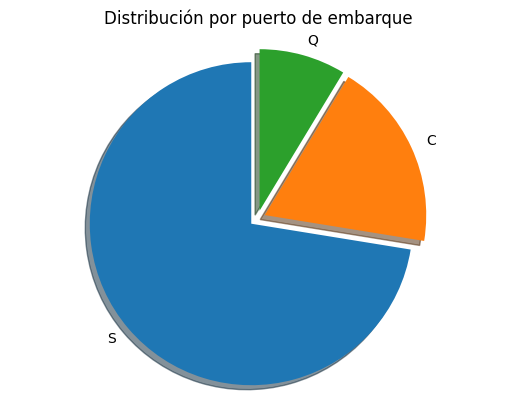

In [27]:
plt.pie([total_embarque_S, total_embarque_C, total_embarque_Q],
        labels=["S", "C", "Q"],
        shadow=True,
        startangle=90,
        explode=(0.05, 0.05, 0.05))

plt.title("Distribución por puerto de embarque")
plt.axis('equal')
plt.show()

Como podemos apreciar claramente en el gráfico de tarta, la mayoría de personas se subieron en Southampton.

### Personas que viajaban solas

In [28]:
total_personas_solas = len(df.loc[(df.SibSp == 0)&(df.Parch == 0)])

total_mujeres_solas = len(df.loc[(df.SibSp == 0)&(df.Parch == 0)&(df.Sex == 'female')])
total_hombres_solos = len(df.loc[(df.SibSp == 0)&(df.Parch == 0)&(df.Sex == 'male')])
total_personas_solas_sobrevivieron = df.Survived.loc[(df.SibSp == 0)&(df.Parch == 0)&(df.Survived == 1)].count()

mujeres_solas_sobrevivieron = df.Survived.loc[(df.SibSp == 0)&(df.Parch == 0)&(df.Sex == 'female')&(df.Survived == 1)].count()
hombre_solos_sobrevivieron = df.Survived.loc[(df.SibSp == 0)&(df.Parch == 0)&(df.Sex == 'male')&(df.Survived == 1)].count()

ratio_supervivencia_hombres_solos = round((hombre_solos_sobrevivieron / total_hombres_solos) * 100, 2)
ratio_supervivencia_mujeres_solas = round((mujeres_solas_sobrevivieron / total_mujeres_solas) * 100, 2)

print(f"En el Titanic, {total_personas_solas} personas viajaban solas.")

print()

print(f"Del total ({total_personas_solas}), {total_hombres_solos} ({round((total_hombres_solos / total_personas_solas) * 100, 2)}%) personas eran hombres y {total_mujeres_solas} ({round((total_mujeres_solas / total_personas_solas) * 100, 2)}%) eran mujeres.")
print(f"Y de todas las personas solas sobrevivieron {total_personas_solas_sobrevivieron} personas, que equivale al {round((total_personas_solas_sobrevivieron / total_personas_solas) * 100, 2)}%.")

print(f"De las {total_mujeres_solas} mujeres que viajaban solas, sobrevivieron {mujeres_solas_sobrevivieron} mujeres, que equivale al {round((mujeres_solas_sobrevivieron / total_mujeres_solas) * 100, 2)}%.")

print()

print(f"Los hombres tienen un ratio de supervivencia del {ratio_supervivencia_hombres_solos}%, mientras que el de las mujeres es del {ratio_supervivencia_mujeres_solas}%.")

En el Titanic, 537 personas viajaban solas.

Del total (537), 411 (76.54%) personas eran hombres y 126 (23.46%) eran mujeres.
Y de todas las personas solas sobrevivieron 163 personas, que equivale al 30.35%.
De las 126 mujeres que viajaban solas, sobrevivieron 99 mujeres, que equivale al 78.57%.

Los hombres tienen un ratio de supervivencia del 15.57%, mientras que el de las mujeres es del 78.57%.


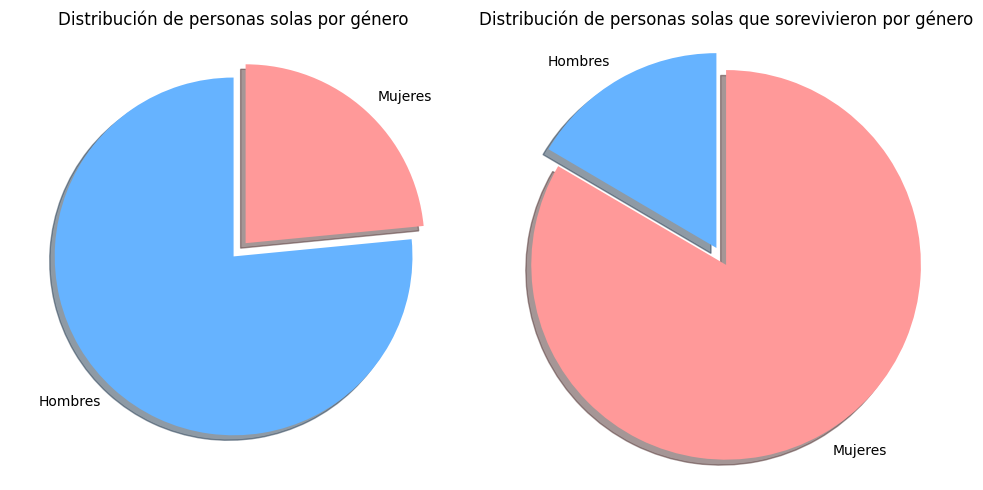

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie([total_personas_solas - total_mujeres_solas, total_mujeres_solas],
        labels=["Hombres", "Mujeres"],
        colors=["#66b3ff", "#ff9999"],
        shadow=True,
        startangle=90,
        explode=(0, 0.1))

axs[1].pie([ratio_supervivencia_hombres_solos, ratio_supervivencia_mujeres_solas],
        labels=["Hombres", "Mujeres"],
        colors=["#66b3ff", "#ff9999"],
        shadow=True,
        startangle=90,
        explode=(0, 0.1))

axs[0].set_title("Distribución de personas solas por género")
axs[1].set_title("Distribución de personas solas que sorevivieron por género")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [30]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


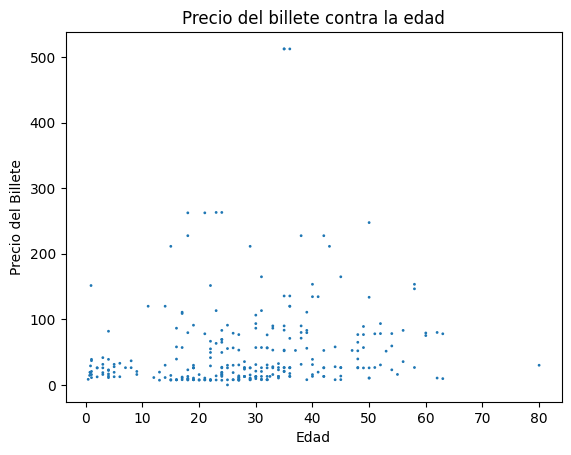

In [31]:
plt.scatter(df.Age, df.Fare, df.Survived)
plt.title("Precio del billete contra la edad")
plt.xlabel("Edad")
plt.ylabel("Precio del Billete")
plt.show()

In [39]:
# Tasa de supervivencia general
ratio_supervivencia = df['Survived'].mean()
print(f"{ratio_supervivencia = }")
print()

df.groupby('Embarked')['Survived'].count()

# Tasa de supervivencia por puerto de embarque
ratio_supervivencia_por_embarque = df.groupby('Embarked')['Survived'].mean()
print(f"Ratio de supervivencia por embarque:\n{ratio_supervivencia_por_embarque}")

ratio_supervivencia = 0.3838383838383838

Ratio de supervivencia por embarque:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


Comparando el ratio de supervivencia por embarque con el ratio de supervivencia general, podemos apreciar que los del embarque **C** tuvieron mucha mayor tasa de supervivencia. Mientras que los del **Q** se mantienen en la media, y los que desembarcaron por el puerto **S** tuvieron mucha menor tasa de supervivencia.

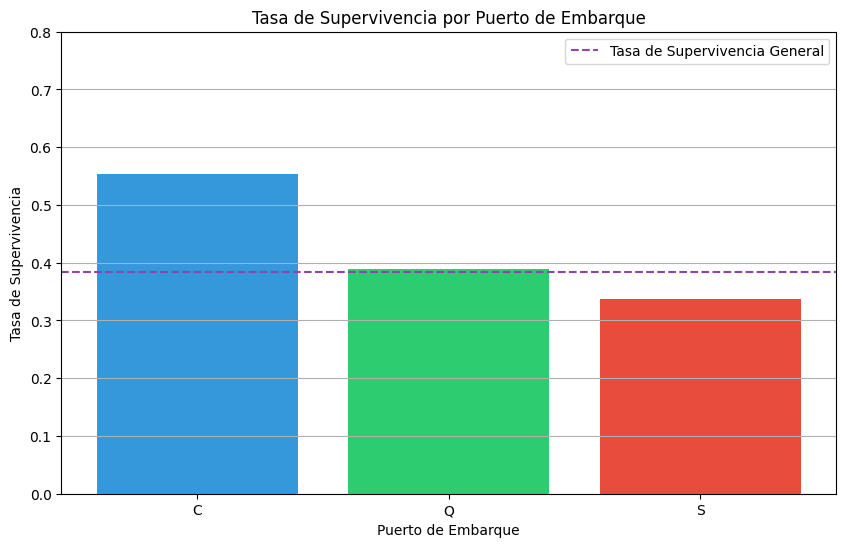

In [86]:
# Gráfica de tasa de supervivencia por puerto de embarque
plt.figure(figsize=(10, 6))
plt.bar(ratio_supervivencia_por_embarque.index, ratio_supervivencia_por_embarque.values, color=['#3498db', '#2ecc71', '#e74c3c'])
plt.axhline(y=ratio_supervivencia, color='#8e44ad', linestyle='--', label='Tasa de Supervivencia General')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Tasa de Supervivencia')
plt.title('Tasa de Supervivencia por Puerto de Embarque')
plt.ylim(0, 0.8)
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [34]:
# Tasa de supervivencia por puerto de embarque y sexo
ratio_supervivencia_por_embarque_sexo = df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()
ratio_supervivencia_por_embarque_sexo

Sex,female,male
Embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.689655,0.174603


Analizando estos datos y comparándolos con los obtenidos previamente, podemos apreciar claramente que las chicas independiéntemente de su puerto de embarque tienen una proporción de supervivencia mucho mayor que los hombres. Contrastándolo con los conocimientos históricos del evento tiene sentido, ya que sabemos que se priorizaron a las mujers sobre los hombres. 

También podemos ver que se mantienen las proporciones de supervivencia por embarque que hemos concluido anteriormente. Excepto en el caso de los hombres en el puerto **Q**, que tienen una tasa de supervivencia inferior que la de los hombres de embarque **S**.

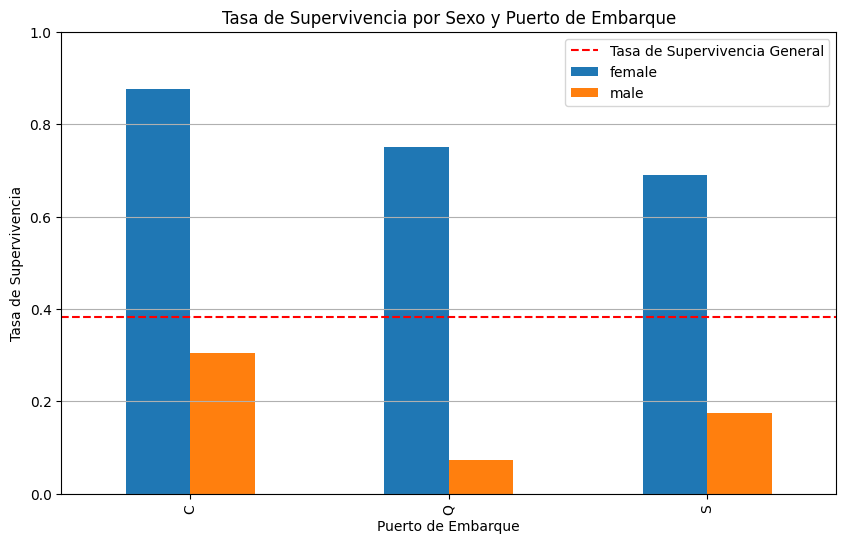

In [94]:
# Gráfica de tasa de supervivencia por sexo y puerto de embarque
ratio_supervivencia_por_embarque_sexo.plot(kind='bar', figsize=(10, 6))
plt.axhline(y=ratio_supervivencia, color='r', linestyle='--', label='Tasa de Supervivencia General')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Tasa de Supervivencia')
plt.title('Tasa de Supervivencia por Sexo y Puerto de Embarque')
plt.ylim(0, 1)
plt.grid(True, axis="y")
plt.legend()
plt.show()